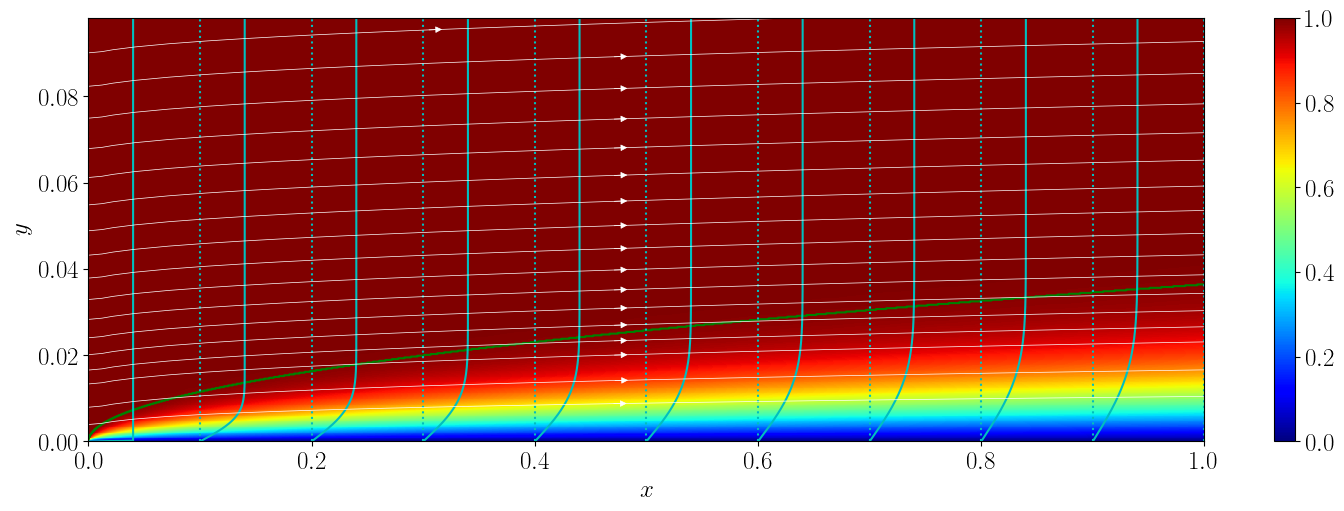

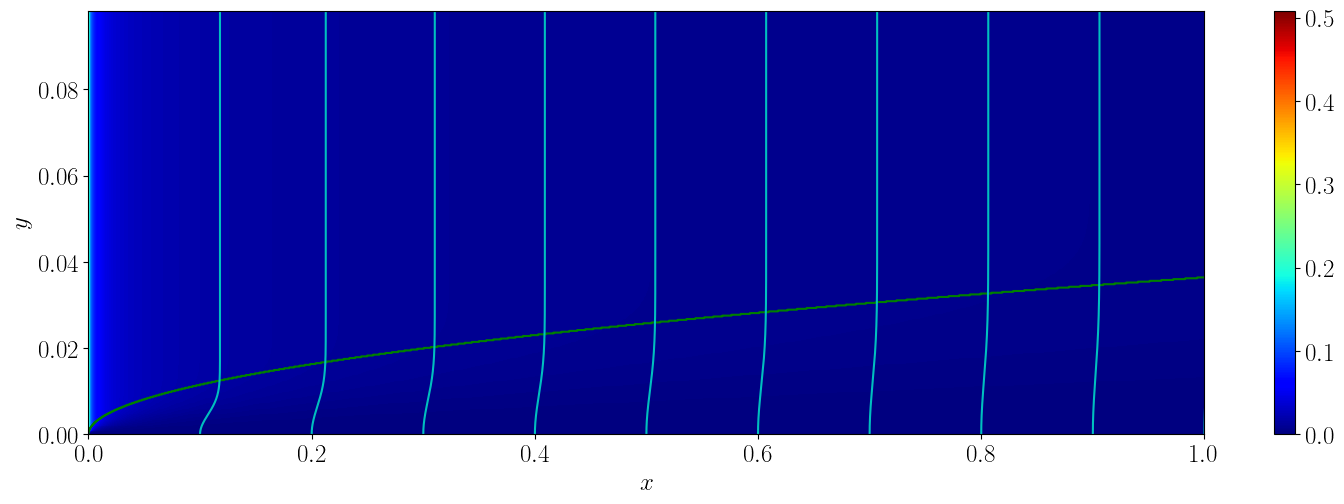

In [1]:
#%%
import numpy as np
from matplotlib import pyplot as plt
##%matplotlib widget

#%%
Nx = 10000
Ny = 500
Re = 10000.0

ymax = 2 * 4.91/np.sqrt(Re)

x = np.linspace( 0.0 , 1.0 , Nx )
y = np.linspace( 0.0 , ymax , Ny )

dx = x[1]-x[0]
dy = y[1]-y[0]

#%%
U = np.ones((Nx,Ny))
V = np.zeros((Nx,Ny))

#%% boundary condition
U[:,0] = 0.0
V[:,0] = 0.0

#%%
for ix in range(1,Nx):
    dudy    = (1/(2*dy)) * (U[ix-1,2:]-U[ix-1,0:Ny-2])
    d2udy2  = (1/dy**2) * (U[ix-1,2:]-2*U[ix-1,1:Ny-1]+U[ix-1,0:Ny-2])
    U[ix,1:Ny-1] = U[ix-1,1:Ny-1] \
                 - dx * V[ix,1:Ny-1]/U[ix,1:Ny-1] * dudy \
                 + dx/Re * d2udy2 / U[ix,1:Ny-1]
    U[ix,0] = 0.0 # not necessary, just in case
    
    dudx       = (1/dx) * (U[ix,:]-U[ix-1,:]) # upwind in x
    # dudx[1:Ny] = .5*(dudx[1:Ny]+dudx[0:Ny-1]) # take the average
    
    V[ix,1:Ny] = np.cumsum(-dy*dudx[0:Ny-1])
    V[ix,0] = 0.0 # not necessary, just in case

#%%
d99 = np.zeros((Nx,1))
for i in range(0,len(x)):
    itmp = np.argmin(np.abs(U[i,:]-.99))
    d99[i] = y[itmp]


#%%
XX, YY = np.meshgrid(x,y)

# fig, axs = plt.subplots(2, 2)
plt.figure(1,figsize=(18,5.5))
plt.rc('text',usetex=True)
# matplotlib.rcParams['font.size'] = 8.0
plt.rcParams.update({'font.size': 18})
plt.pcolormesh(x,y,U.T,shading='nearest',cmap='jet')
plt.colorbar()
plt.plot(x,d99,'g')

for i in range(0,11):
    this_i = np.argmin(np.abs(x-np.single(i)*0.1))
    # plt.figure(1)
    plt.plot(x[this_i]+U[this_i,:]*.04,y,'c')
    plt.plot(x[this_i]*np.ones((Ny,1)),y,':c')

seed_points = np.zeros((20,2))
# seed_points[:,1] = ymax * np.linspace(.05,1.0,20)**2
seed_points[:,1] = ymax * np.linspace(.2,1.0,20)**2
# seed_points = np.array([[np.zeros((10,1))], np.reshape( np.linspace(ymax/20.0,ymax,10) , 1,-1) ]])
plt.streamplot( XX,YY , U.T,V.T , start_points=seed_points , \
               color='white',maxlength=2,linewidth=0.5,broken_streamlines=True)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,1)
plt.ylim(0,np.max(y))

plt.savefig('laminarBL_BLeq_U.png',format='png')
plt.show()

plt.figure(1,figsize=(18,5.5))
plt.rc('text',usetex=True)
plt.rcParams.update({'font.size': 18})
plt.pcolormesh(x,y,V.T,shading='nearest',cmap='jet')
plt.colorbar()
plt.plot(x,d99,'g')

for i in range(0,11):
    this_i = np.argmin(np.abs(x-np.single(i)*0.1))
    # plt.figure(1)
    plt.plot(x[this_i]+V[this_i,:],y,'c')
    # plt.plot(x[this_i]*np.ones((Ny,1)),y,':c')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,1)
plt.ylim(0,np.max(y))
plt.savefig('laminarBL_BLeq_V.png',format='png')
# plt.show()











In [2]:
seed_points

array([[0.        , 0.003928  ],
       [0.        , 0.00575599],
       [0.        , 0.00793217],
       [0.        , 0.01045653],
       [0.        , 0.01332909],
       [0.        , 0.01654983],
       [0.        , 0.02011876],
       [0.        , 0.02403588],
       [0.        , 0.02830119],
       [0.        , 0.03291468],
       [0.        , 0.03787637],
       [0.        , 0.04318624],
       [0.        , 0.0488443 ],
       [0.        , 0.05485055],
       [0.        , 0.06120499],
       [0.        , 0.06790761],
       [0.        , 0.07495843],
       [0.        , 0.08235743],
       [0.        , 0.09010462],
       [0.        , 0.0982    ]])